                                     Customer Churn Prediction  

Aim:The main goal of this project is to build a supervised learning model that can predict whether a customer is likely to churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("TelcoCustomerChurn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
Data Understanding:
CustomerID:Unique identifier for each customer.
Gender:Gender of the customer.
Senior Citizen:Indicates whether the customer is senior citizen or not.
Partner:Whether the customer has a partner.
Dependents:Whether the customer has dependents.
Tenure:Number of months the customer has been with the company.
Phone Service:Whether the customer has a phone service.
Multiple Lines:Whether the customer has multiple phone lines.
Internet Service:Type of internet service used.
Online Security:whether the customer has online security service.
Online Backup:Whether the customer has online backup service.
Device Protection:whether the customer has device protection service.
Tech Support:whether the customer has technical support service.
Streaming TV:whether the customer uses streaming tv services.
Streaming Movies:whether the customer  uses streaming movie service.
Contract:Type of contract the customer has.
Paperless Billing:Whether the customer uses paperless billing.
Payment Method:Payment method used by the customers.
Monthly Charges:Monthly amount charged to the customer
Total Charges:Total amount charged to the customer.
Churn:Indicates whether the customer has left the company.

In [4]:
#convert valid numbers correctly
#Convert blanks/invalid values to NaN
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

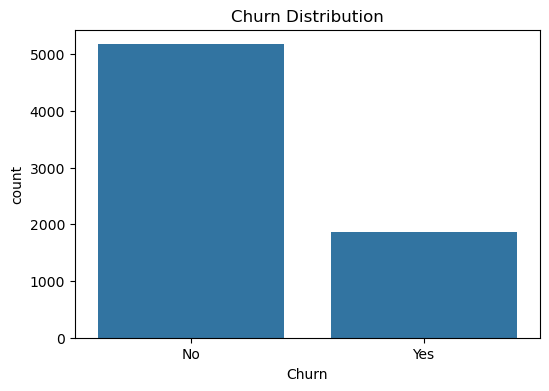

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

The majority of customers did not churn, while a much smaller portion indicating a highly imbalanced target variable.

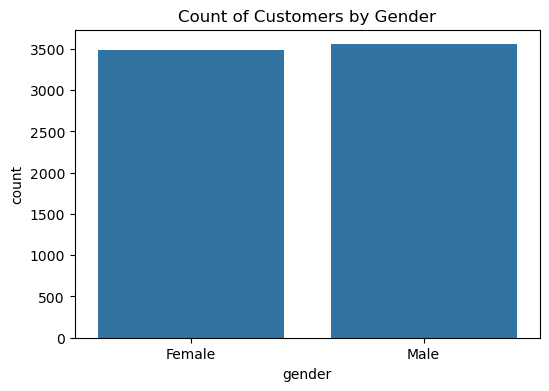

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender',data=df)
plt.title('Count of Customers by Gender')
plt.show()

Count of customers by gender shows males are significantly higher than females, but the difference is not significant.

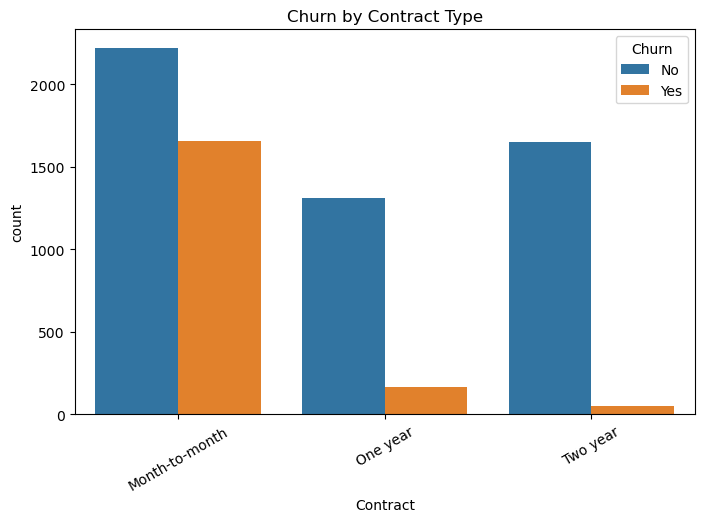

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',hue='Churn',data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=30)
plt.show()

Month-to month customers show the highest churn ,while one year and two year contracts have much lower churn,with two year contracts showing the least churn.

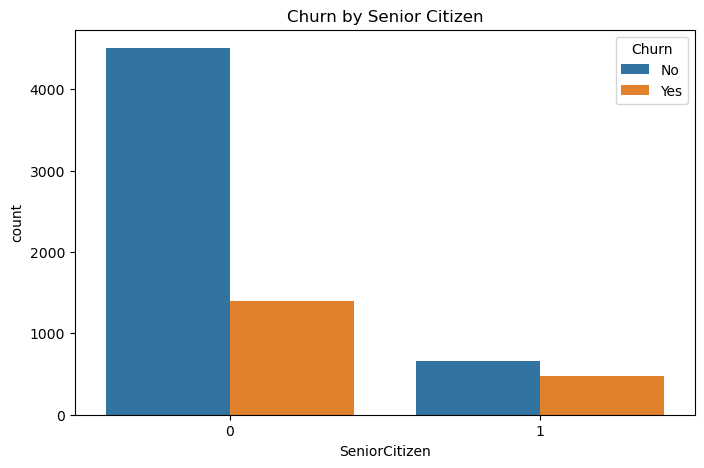

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title('Churn by Senior Citizen')
plt.xticks(rotation=360)
plt.show()

Most Customers are not senior citizen,but seniors churn much more often even though they are fewer.

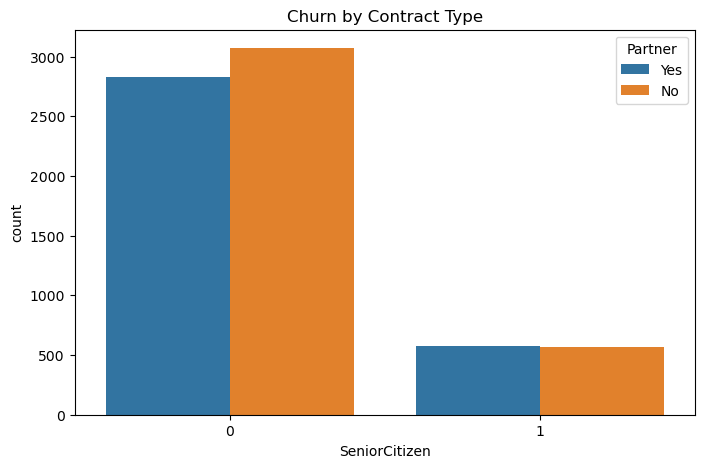

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='SeniorCitizen',hue='Partner',data=df)
plt.title('Churn by Contract Type')
#plt.xticks(rotation=30)
plt.show()

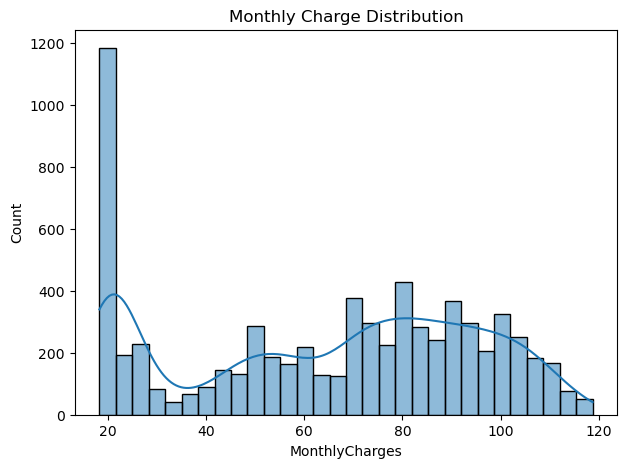

In [20]:
plt.figure(figsize=(7,5))
sns.histplot(df['MonthlyCharges'], bins=30,kde=True)
plt.title('Monthly Charge Distribution')
plt.show()

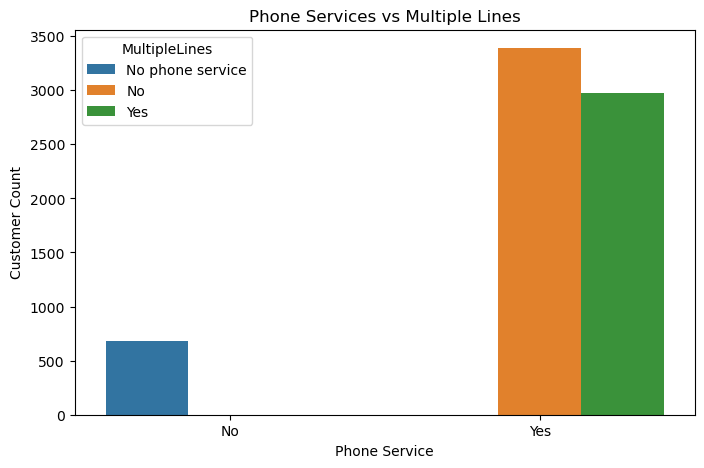

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='PhoneService',hue='MultipleLines',data=df)
plt.xlabel('Phone Service')
plt.ylabel('Customer Count')
plt.title('Phone Services vs Multiple Lines')
#plt.xticks(rotation=30)
plt.show()

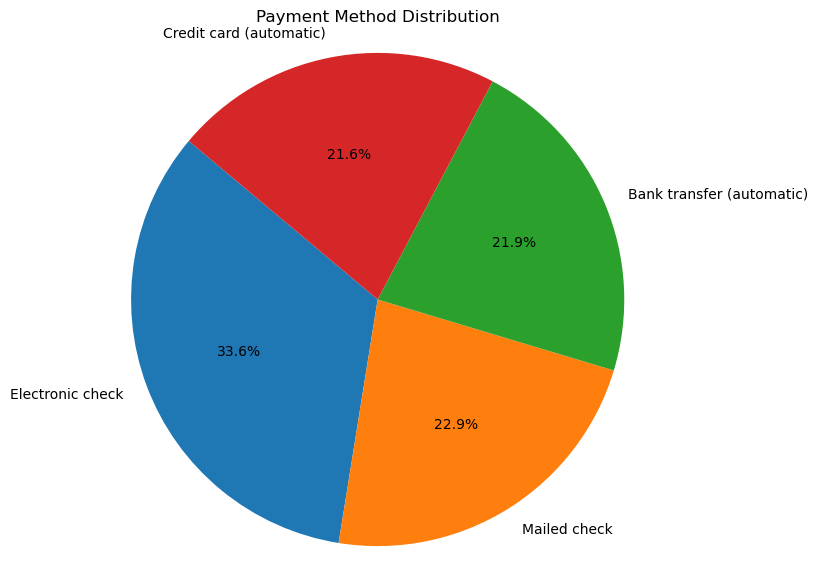

In [22]:
payment_counts= df['PaymentMethod'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',startangle=140)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

Electronic check is the most used payment method,followed by mail check,bank transfer and credit card.

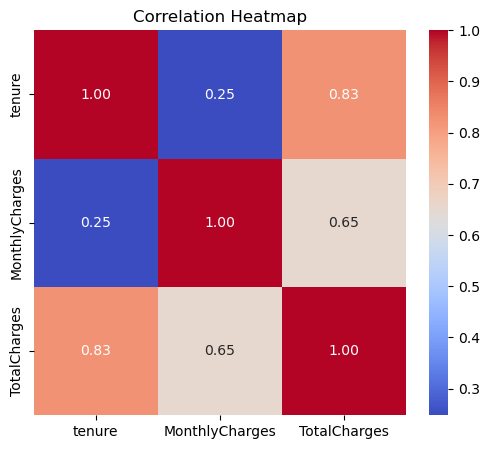

In [24]:
numeric_cols =['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(),
             annot=True,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Total charges show a strong positive correlation with tenure and a moderate-to-strong correlation with monthly charges.

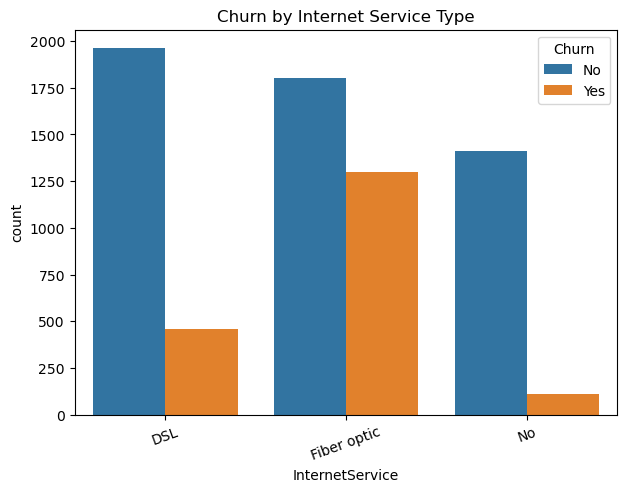

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.title('Churn by Internet Service Type')
plt.xticks(rotation=20)
plt.show()

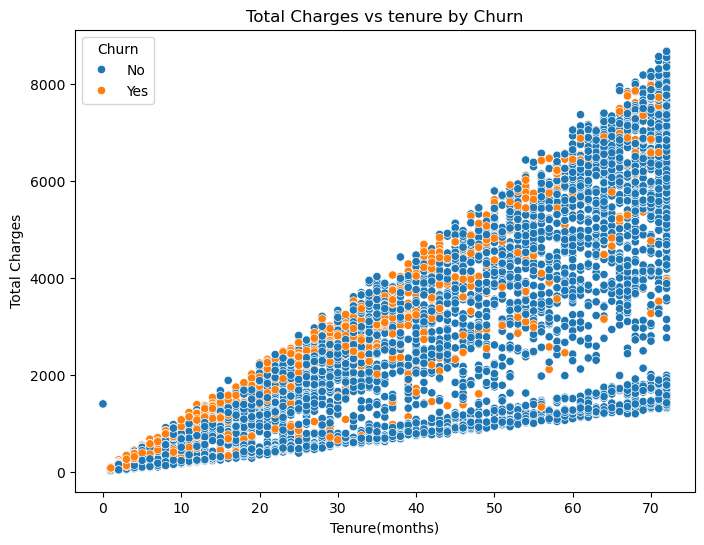

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure',y='TotalCharges',hue='Churn',data=df)
plt.title('Total Charges vs tenure by Churn')
plt.xlabel('Tenure(months)')
plt.ylabel('Total Charges')
plt.show()

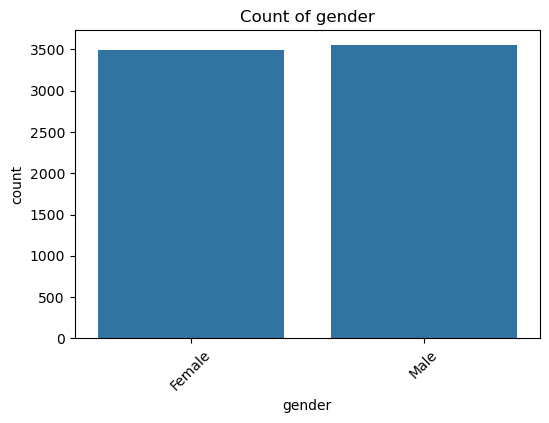

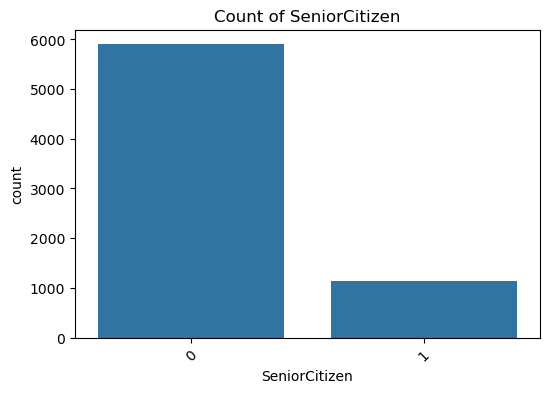

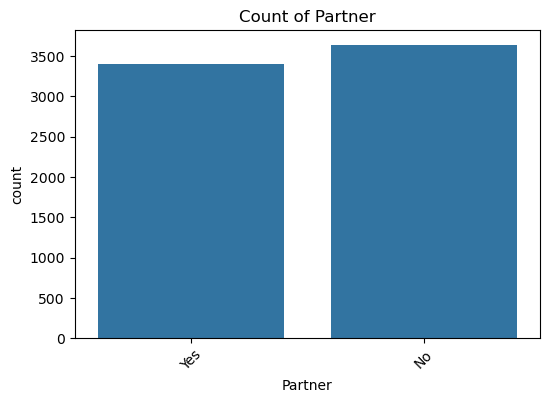

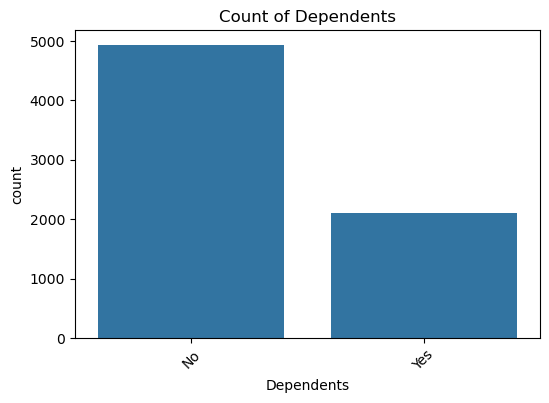

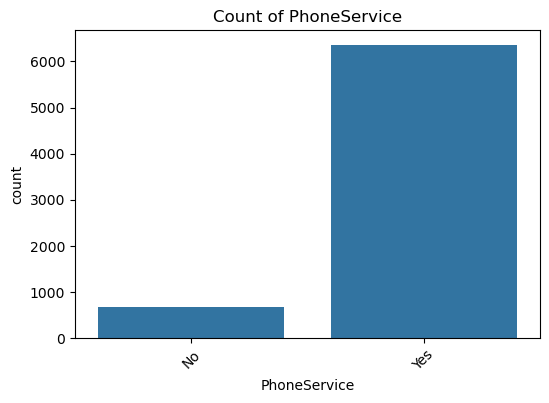

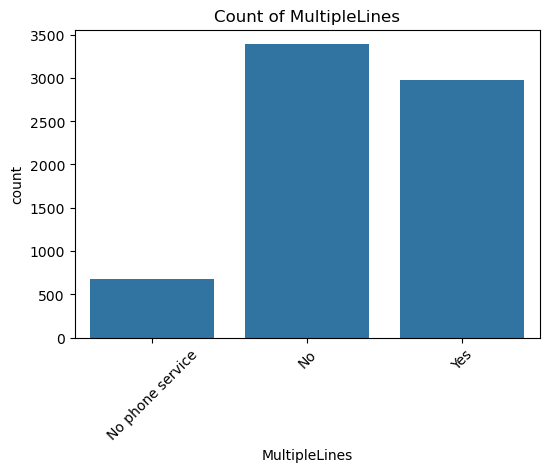

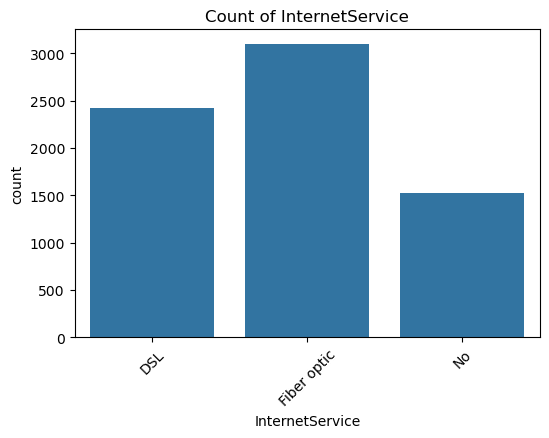

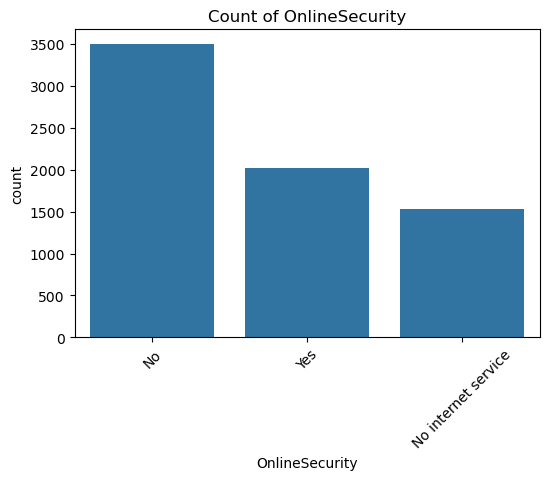

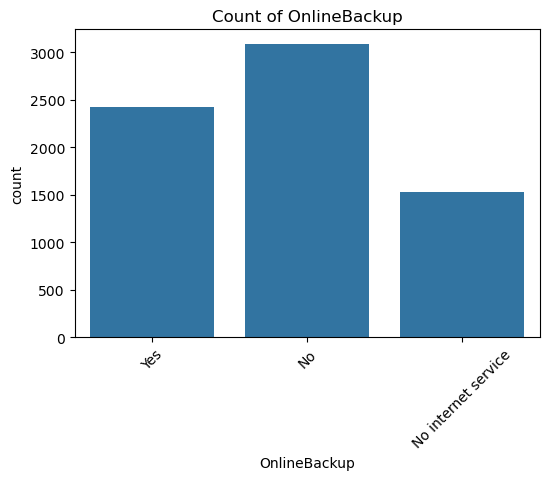

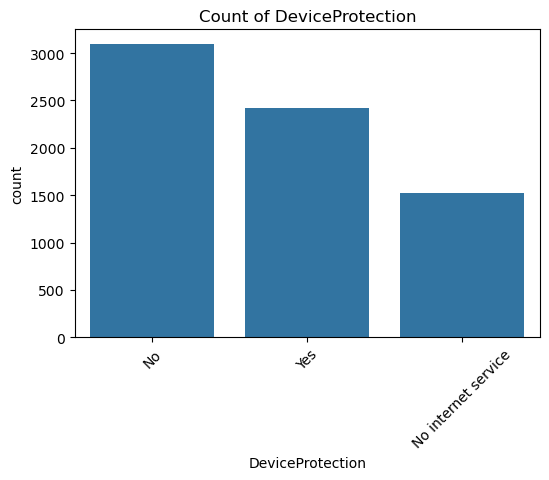

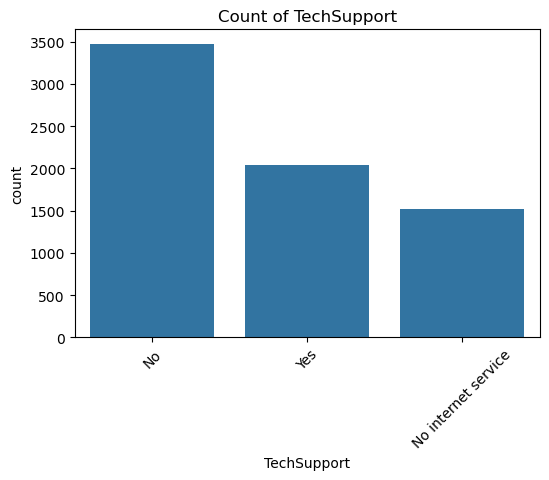

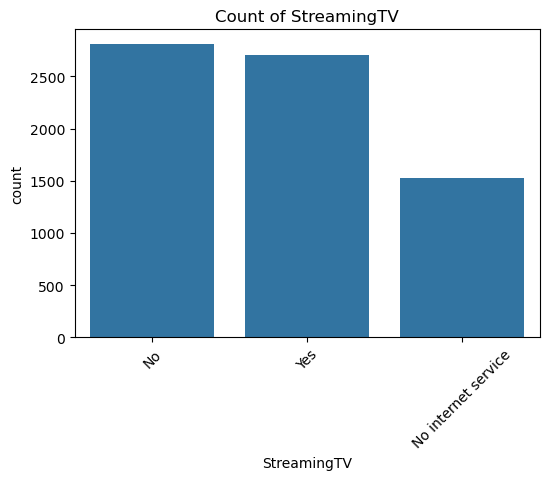

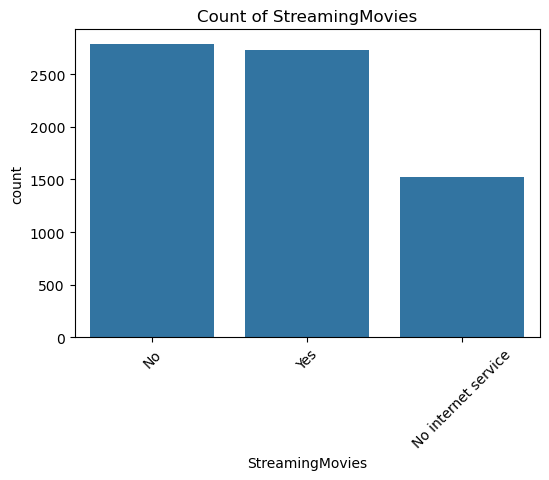

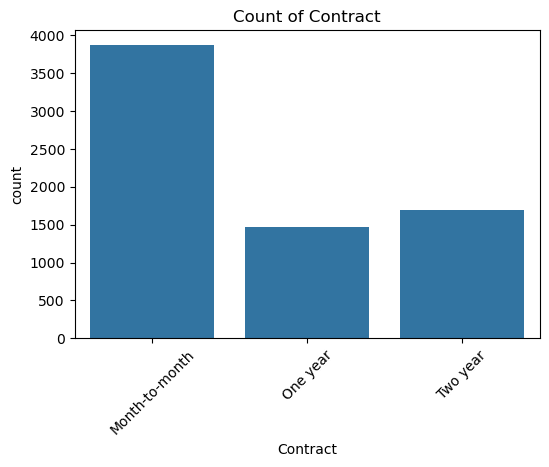

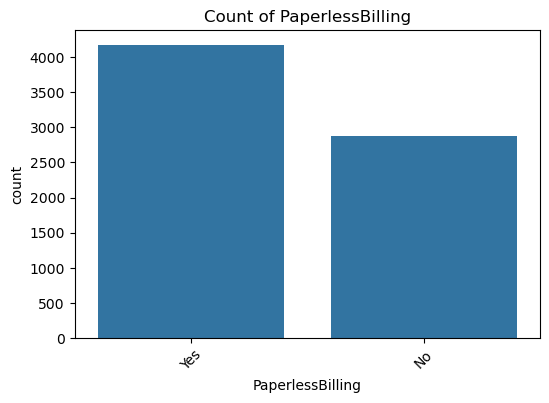

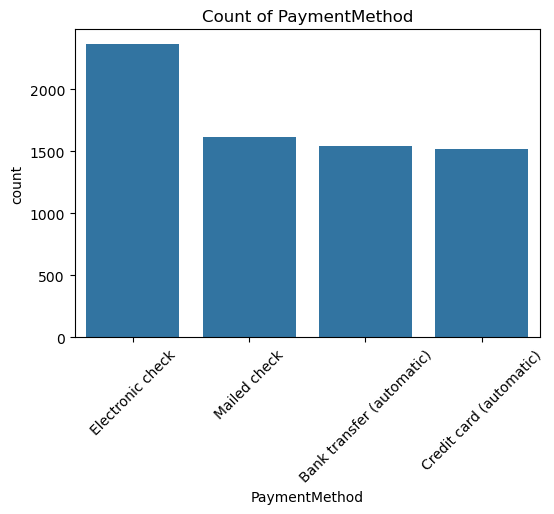

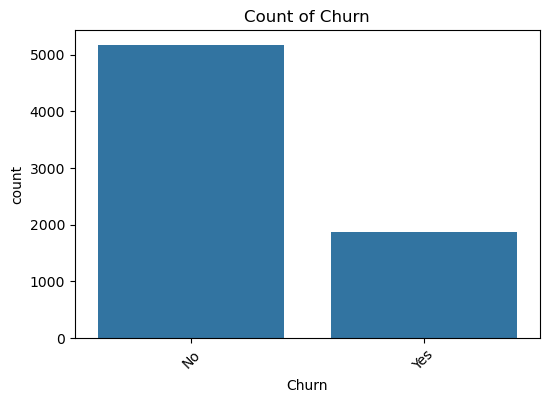

In [27]:
categorical_cols =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col,data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
pd.crosstab(df.Dependents,df.Churn)

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [29]:
pd.crosstab(df.TechSupport,df.Churn)

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [30]:
pd.crosstab(df.DeviceProtection,df.Churn)

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [31]:
pd.crosstab(df.InternetService,df.Churn)

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [32]:
df=pd.get_dummies(df, columns=['gender'],drop_first=True)
df=pd.get_dummies(df, columns=['Partner'],drop_first=True)
df=pd.get_dummies(df, columns=['Dependents'],drop_first=True)
df=pd.get_dummies(df, columns=['PhoneService'],drop_first=True)
df=pd.get_dummies(df, columns=['PaperlessBilling'],drop_first=True)

In [33]:
df['MultipleLines'] = df['MultipleLines'].map({'No phone service':0,'No':1,'Yes':2})
df['InternetService'] = df['InternetService'].map({'DSL':0,'Fiber optic':1,'No':2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':2})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':0,'No':1,'No internet service':2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':2})
df['TechSupport'] = df['TechSupport'].map({'No':0,'Yes':1,'No internet service':2})
df['StreamingTV'] = df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})
df['Contract'] = df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [34]:
df=df.drop(columns=['customerID'])

In [35]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [37]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [38]:
y_train.to_frame().value_counts()

Churn
No       3635
Yes      1295
Name: count, dtype: int64

In [39]:
y_test.to_frame().value_counts()

Churn
No       1539
Yes       574
Name: count, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [41]:
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)

In [42]:
y_train_s.to_frame().value_counts()

Churn
No       3635
Yes      3635
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train_s)

In [44]:
x_test=scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(x_train,y_train_s)

LogisticRegression()

In [46]:
y_pred=LR.predict(x_train)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
accuracy=accuracy_score(y_train_s,y_pred)
accuracy

0.8008253094910591

In [48]:
report = classification_report(y_train_s,y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.76      0.79      3635
         Yes       0.78      0.84      0.81      3635

    accuracy                           0.80      7270
   macro avg       0.80      0.80      0.80      7270
weighted avg       0.80      0.80      0.80      7270



In [49]:
y_pred_=LR.predict(x_test)

In [50]:
y_pred_

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [51]:
accuracy_lr=accuracy_score(y_test,y_pred_)
accuracy_lr

0.7586370089919545

In [52]:
report = classification_report(y_test,y_pred_)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.76      0.82      1539
         Yes       0.54      0.75      0.63       574

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



In [53]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes'],
      dtype='object')

In [54]:
def churn_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    if 'gender' in input_df.columns:
        input_df=pd.get_dummies(input_df ,columns= ['gender'],drop_first=True)
    if 'Partner' in input_df.columns:
        input_df=pd.get_dummies(input_df ,columns= ['Partner'],drop_first=True)
    if 'Dependents' in input_df.columns:
        input_df=pd.get_dummies(input_df ,columns= ['Dependents'],drop_first=True)
    if 'PhoneService' in input_df.columns:
        input_df=pd.get_dummies(input_df ,columns= ['PhoneService'],drop_first=True)
    if 'PaperlessBilling' in input_df.columns:
        input_df=pd.get_dummies(input_df ,columns= ['PaperlessBilling'],drop_first=True)
    if 'MultipleLines' in input_df.columns:
        input_df['MultipleLines']=input_df['MultipleLines'].map({'No phone service':0,'No':1,'Yes':2})
    if 'InternetService' in input_df.columns:
        input_df['InternetService']=input_df['InternetService'].map({'DSL':0,'Fiber optic':1,'No':2})
    if 'OnlineSecurity' in input_df.columns:
        input_df['OnlineSecurity']=input_df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':2})
    if 'OnlineBackup' in input_df.columns:
        input_df['OnlineBackup']=input_df['OnlineBackup'].map({'Yes':0,'No':1,'No internet service':2})
    if 'DeviceProtection' in input_df.columns:
        input_df['DeviceProtection']=input_df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':2})
    if 'TechSupport' in input_df.columns:
        input_df['TechSupport']=input_df['TechSupport'].map({'No':0,'Yes':1,'No internet service':2})
    if 'StreamingTV' in input_df.columns:
        input_df['StreamingTV']=input_df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':2})
    if 'StreamingMovies' in input_df.columns:
        input_df['StreamingMovies']=input_df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})
    if 'Contract' in input_df.columns:
        input_df['Contract']=input_df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
    if 'PaymentMethod' in input_df.columns:
        input_df['PaymentMethod']=input_df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

    for col in ['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','PhoneService_Yes','PaperlessBilling_Yes']:
        if col not in input_df.columns:
            input_df[col] = 0



    
    input_df = input_df[['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes']]
    input_df = scaler.transform(input_df)
    prediction = LR.predict(input_df)
    return prediction[0]

In [55]:
input_data = { 'gender':'Female', 'SeniorCitizen':0, 'Partner':'Yes', 'Dependents':'No',
       'tenure':46, 'PhoneService':'Yes', 'MultipleLines':'Yes', 'InternetService':'DSL',
       'OnlineSecurity':'No', 'OnlineBackup':'Yes', 'DeviceProtection':'Yes', 'TechSupport':'Yes',
       'StreamingTV':'No', 'StreamingMovies':'Yes', 'Contract':'Month-to-month', 'PaperlessBilling':'Yes',
       'PaymentMethod':'Electronic check', 'MonthlyCharges':111.05, 'TotalCharges':3456.67, }
predicted_churn =churn_prediction(input_data)
print("Predicted Churn:",predicted_churn)

Predicted Churn: No


Naive Bayes

In [61]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [63]:
scaler= StandardScaler()

In [65]:
x_train = scaler.fit_transform(x_train)

In [66]:
x_test = scaler.transform(x_test)

In [67]:
from sklearn .metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [68]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [69]:
print(x_train.shape,y_train.shape)

(4930, 19) (4930,)


In [70]:
y_train_pred = model.predict(x_train)

In [71]:
accuracy_tr = accuracy_score(y_train,y_train_pred)
print(accuracy_tr)

0.708316430020284


In [76]:
y_pred = model.predict(x_test)

In [78]:
acc = accuracy_score(y_test,y_pred)
acc

0.7179365830572646

In [79]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.92      0.67      0.78      1539
         Yes       0.49      0.84      0.62       574

    accuracy                           0.72      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.72      0.73      2113

